## ATENCION !!!!!
Una vez ejecutada la notebook apagar el kernel (ir a menú File --> Stop Kernel). Para restartearlo: menú Kernel --> Restart

In [2]:
## SETEO DE VARIABLES (PRESTAR ATENCION ACÁ)

## SETEO OBLIGATORIO!!!

## CAMBIAR: workspace_id: es el skill-id del skill que quieren probar
workspace_id = ''

## CAMBIAR: Si quiero grabar archivo con errores poner True, sino poner False
GRABAR_ARCHIVO = True
NOMBRE_ARCHIVO = 'ambig_utter_' + workspace_id[-6:] + '.csv' # nombre del archivo de los utterances ambiguos

############################################################################################################
## SETEO OPCIONAL (REVISAR SI LAS VARIABLES ESTÁN OK) 
# By default we only need the IAM API Key
# If you run the notebook regularly you can uncomment the two lines below & comment out the line after it
iam_apikey = ''
# ENDPOINT_URL: lo dejan como esta ya que es la URL donde contesta el cloud object storage (apunta al de desarrollo)
ENDPOINT_URL = 'https://' # change this based on the region of your cos bucket 
# COS_API_KEY_ID: idem al anterior 
COS_API_KEY_ID = ''
# RESOURCE_INSTANCE_ID: idem al anterior 
RESOURCE_INSTANCE_ID = 'crn:'


In [2]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='', project_access_token='')
pc = project.project_context


In [3]:
from IPython.display import Markdown, display, HTML
import warnings
warnings.filterwarnings('ignore')

# Dialog Skill Analysis for Watson Assistant

In [4]:
!pip install --index-url https://pypi.python.org/simple  -U "pip"
!pip install --index-url https://pypi.python.org/simple  -U "assistant-dialog-skill-analysis>=1.2.1"

Looking in indexes: https://pypi.python.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2
Looking in indexes: https://pypi.python.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.1/389.1 kB 28.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/a4/06/85618f80ae552ac309ead9702c6826edda27884e26e07fdc8fa93f283546/regex-2023.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 36.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.4/770.4 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.2/369.2 kB 28.8 MB/s eta 0:00:00
  Created wheel for ibm-watson: filename=ibm_watson-7.0.0-py3-none-any.whl size=389793 sha256=6f713198eb840d9d784a26641e084b6d2c9d895694237202a7a90d4140a96f2b
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b8/c3/c1/0e35cd88e7305131fabfc503b615b0675ad255a639a5b49a79
Successfully built ibm-watson
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 23.3 will enforce this 

In [5]:
!pip install --index-url https://pypi.python.org/simple  -U "nbconvert == 6.5.0"

Looking in indexes: https://pypi.python.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.6/561.6 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 15.7 MB/s eta 0:00:00
  Obtaining dependency information for nbclient>=0.5.0 from https://files.pythonhosted.org/packages/ac/5a/d670ca51e6c3d98574b9647599821590efcd811d71f58e9c89fc59a17685/nbclient-0.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for jupyter-core>=4.7 from https://files.pythonhosted.org/packages/8c/e0/3f9061c5e99a03612510f892647b15a91f910c5275b7b77c6c72edae1494/jupyter_core-5.3.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 13.7 MB/s eta 0:00:00
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 23.3 will enforce this behaviou

In [6]:
# Standard python libraries
import sys, os
import json
import importlib
from collections import Counter

# External python libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import ibm_watson

# Internal python libraries
from assistant_dialog_skill_analysis.utils import skills_util, lang_utils
from assistant_dialog_skill_analysis.highlighting import highlighter
from assistant_dialog_skill_analysis.data_analysis import summary_generator
from assistant_dialog_skill_analysis.data_analysis import divergence_analyzer
from assistant_dialog_skill_analysis.data_analysis import similarity_analyzer
from assistant_dialog_skill_analysis.term_analysis import chi2_analyzer
from assistant_dialog_skill_analysis.term_analysis import keyword_analyzer
from assistant_dialog_skill_analysis.term_analysis import entity_analyzer
from assistant_dialog_skill_analysis.confidence_analysis import confidence_analyzer
from assistant_dialog_skill_analysis.inferencing import inferencer
from assistant_dialog_skill_analysis.experimentation import data_manipulator

[nltk_data] Downloading package stopwords to /home/wsuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/wsuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Table of Contents

1. [Part 1: Training Data Analysis](#part1)<br>
    1.1 [Process Dialog Skill Training Data](#part1.1)<br>
    1.2 [Data Distribution Analsis](#part1.2)<br>
    1.3 [Term Analysis - Correlation Analysis](#part1.3)<br>
    1.4 [Term Analysis - Heat Map](#part1.4)<br>
    1.5 [Ambiguity in Training Data](#part1.5)<br>

<a id='part1'></a>
# Part 1 : Training Data Analysis

<a id='setup'></a>
## Setup: Access Training Data

Please provide access credentials for an existing dialog skill that you would like to analyze.  
Have your API Key & Workspace ID values handy

## ATENCION !!!!!
Una vez ejecutado apagar el kernel

In [7]:
importlib.reload(skills_util)

# Change Assistant API version if needed
# Find Latest --> https://cloud.ibm.com/docs/services/assistant?topic=assistant-release-notes
API_VERSION = '2021-06-14'

# choose a datacenter to use
datacenters = {
    'dallas'    : ('https://api.us-south.assistant.watson.cloud.ibm.com/instances/7da75a49-fc6d-434f-bc0b-6adbbc09ece9','https://iam.cloud.ibm.com/identity/token'),
}
URL, authenticator_url = datacenters['dallas']

# For ICP(IBM Cloud Private), you can disable SSL verification by changing this to True
DISABLE_SSL_VERTIFICATION = False 

#iam_apikey, workspace_id = skills_util.input_credentials()
conversation = skills_util.retrieve_conversation(iam_apikey=iam_apikey,url=URL,api_version=API_VERSION,authenticator_url=authenticator_url)
conversation.set_disable_ssl_verification(DISABLE_SSL_VERTIFICATION)
workspace = skills_util.retrieve_workspace(workspace_id=workspace_id,conversation=conversation)

Pick the language code correspond to your workspace data:   
*Supported Language codes:* **en, fr, de, es, cs, it, pt**

In [8]:
importlib.reload(lang_utils)
LANGUAGE_CODE="es" # change the language code to work with other languages
lang_util = lang_utils.LanguageUtility(LANGUAGE_CODE)

In [9]:
# Extract user workspace
workspace_pd, workspace_vocabulary = skills_util.extract_workspace_data(workspace, language_util=lang_util)
entity_dict = conversation.list_entities(workspace_id).get_result()
entities_list = [item['entity'] for item in entity_dict['entities']]

if entities_list:
    display(Markdown("### Sample of Entities"))
    display(HTML(pd.DataFrame({"Entity":entities_list})
                 .sample(n = len(entities_list) if len(entities_list)<140 else 140)
                 .to_html(index=False)))

### Sample of Entities

Entity
adjCardinales
pagar
pagoTotal
datos
diasDeLaSemana
marcasTarjetaCredito
nuevo
buscar
mediosDePago
pagoMinimo


<a id='part1.1'></a>
## 1.1 Process Dialog Skill Training Data

We generate summary statistics related to the given skill & workspace

In [10]:
importlib.reload(summary_generator)
summary_generator.generate_summary_statistics(workspace_pd, entities_list)

### Summary Statistics

,Data Characteristic,Value
1,Total User Examples,1140
2,Unique Intents,36
3,Average User Examples per Intent,32
4,Standard Deviation from Average,10
5,Total Number of Entities,100


<a id='part1.2'></a>
## 1.2 Data Distribution Analysis

### Class Imbalance Analysis

We analyze whether the dataset contains class imbalance by checking whether the largest intent contains less than double the number of user examples contained in the smallest intent. Presence of imbalance does not necessarily indicate an issue, please review the actions section below

In [11]:
importlib.reload(summary_generator)
class_imb_flag = summary_generator.class_imbalance_analysis(workspace_pd)

### <font style='color:rgb(165, 34, 34);'> Class Imbalance Detected         </font>

- Data could be potentially biased towards intents with more user         examples

- E.g. Intent < meLlegoMas > has < 50 > user examples while intent < destruccionEquipo > has         just < 12 > user examples 

### Distribution of User Examples by Intent
We display the distribution of intents vs the number of examples per intent (sorted by the number of examples per intent) below. Ideally we should not have large variations in terms of number of user examples for various intents. 

## <p style="text-align: center;">Sorted Distribution of User Examples                      per Intent</p>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


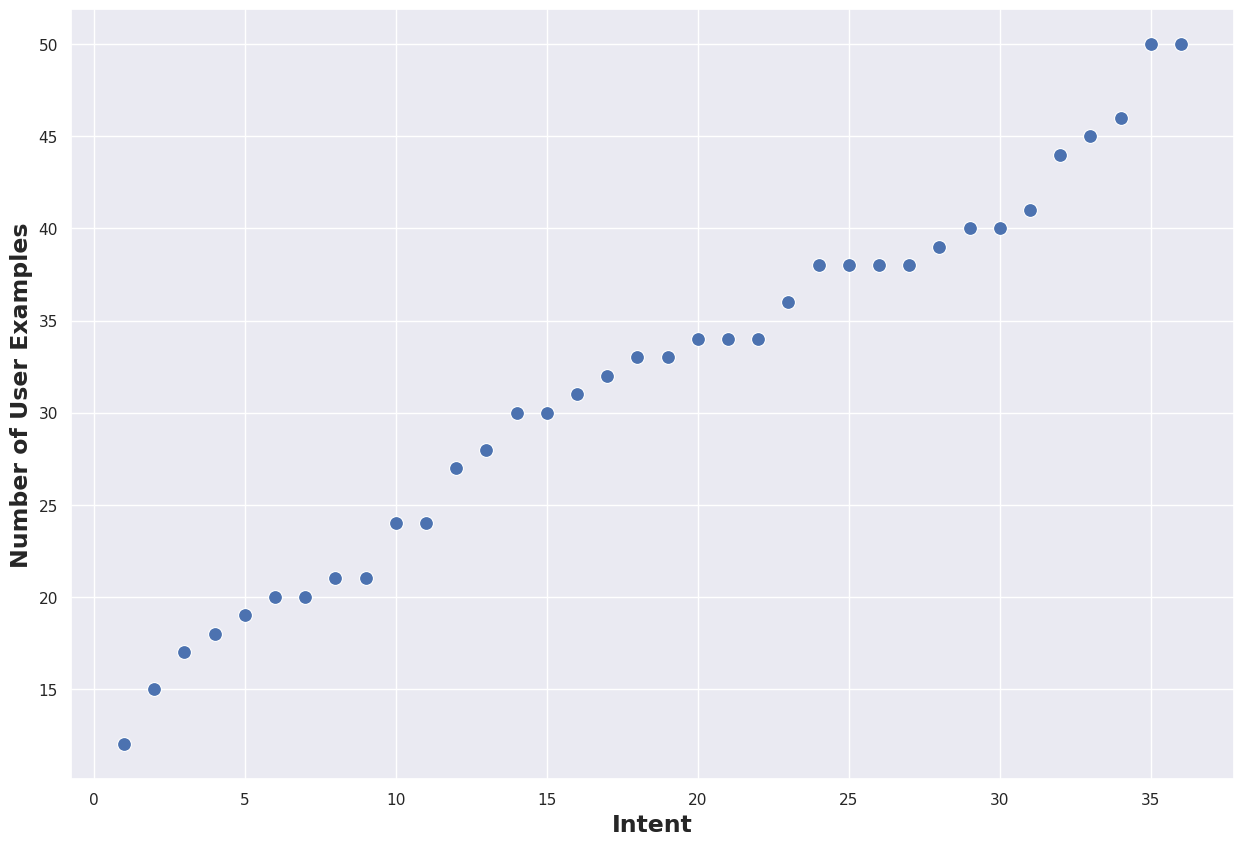

In [12]:
importlib.reload(summary_generator)
summary_generator.scatter_plot_intent_dist(workspace_pd)

In [13]:
importlib.reload(summary_generator)
summary_generator.show_user_examples_per_intent(workspace_pd)

### Sorted Distribution of User Examples per Intent

,Intent,Number of User Examples
1,destruccionEquipo,12
2,problemaTecnico,15
3,cancelaEquipo,17
4,cambioTitularidad,18
5,consultaDatosDisponibles,19
6,consultaPlan,20
7,packs,20
8,cambiarNumero,21
9,wifiPassConsultas,21
10,estadoEquipo,24


<a id='part1.3'></a>
## 1.3 Term Analysis - Correlation Analysis

In [14]:
importlib.reload(chi2_analyzer)
unigram_intent_dict, bigram_intent_dict = chi2_analyzer.get_chi2_analysis(workspace_pd, lang_util=lang_util)

## Chi-squared Analysis

,Intent,Correlated Unigrams,Correlated Bigrams
1,meLlegoMas,"much, sys, tant, aument, numb","fue sys, lleg mas, tant mas, me vin, sys numb"
2,comoPago,"homebanking, minim, encuentr, realiz, pag","pag mis, pag abon, par pag, com pag, realiz pag"
3,pagueDebo,"reclam, dic, ya, mensaj, pag","deb factur, mensaj esta, reclam pag, teng deud, estan reclam"
4,noTengoCable,"pixel, television, cabl, canal, imag","desd sys, sin cabl, negr o, cort cabl, pued ver"
5,consultarSaldo,"es, vencimient, cual, cuant, sald","conoc sald, cuant es, sald mi, cuant teng, consult sald"
6,informarPago,"inform, registr, anunci, avis, pag","entro pag, pag hic, avis pag, comunic pag, inform pag"
7,noTengoInternet,"fall, modem, rout, lent, internet","internet esta, muy lent, teng internet, lent internet, servici internet"
8,cambioPlan,"upgrad, ofrezc, cambi, plan, mejor","par cambi, prepag abon, mejor mi, mejor plan, cambi plan"
9,consultarVisita,"instal, hoy, ven, tecnic, visit","teni ven, fech visit, tecnic par, par hoy, visit tecnic"
10,pagueSuspendida,"pag, ya, cort, line, habilit","line cort, ya pag, habilit line, teng line, me habilit"


### Actions for Anomalous Correlations

If you identify unusual / anomalous correlated terms like: numbers, names etc., which should not be correlated with an intent please read the following:
  
- **Case 1** : If you see names appearing amongst correlated unigrams or bigrams, add more variation of names so no specific names will be correlated  
- **Case 2** : If you see specific numbers like 1234 amongst correlated unigrams or bigrams and are not helpful to the use case, remove or mask these numbers from the examples
- **Case 3** : If you see terms which should never be correlated to that specific intent, consider adding or removing terms/examples so that domain specific terms are correlated with the correct intent

<a id='part1.4'></a>
## 1.4 Term Analysis - Heat Map

By default we show only the top 25 intents with the highest number of user examples in the analysis.

## <p style="text-align: center;"> Token Frequency per Intent </p>

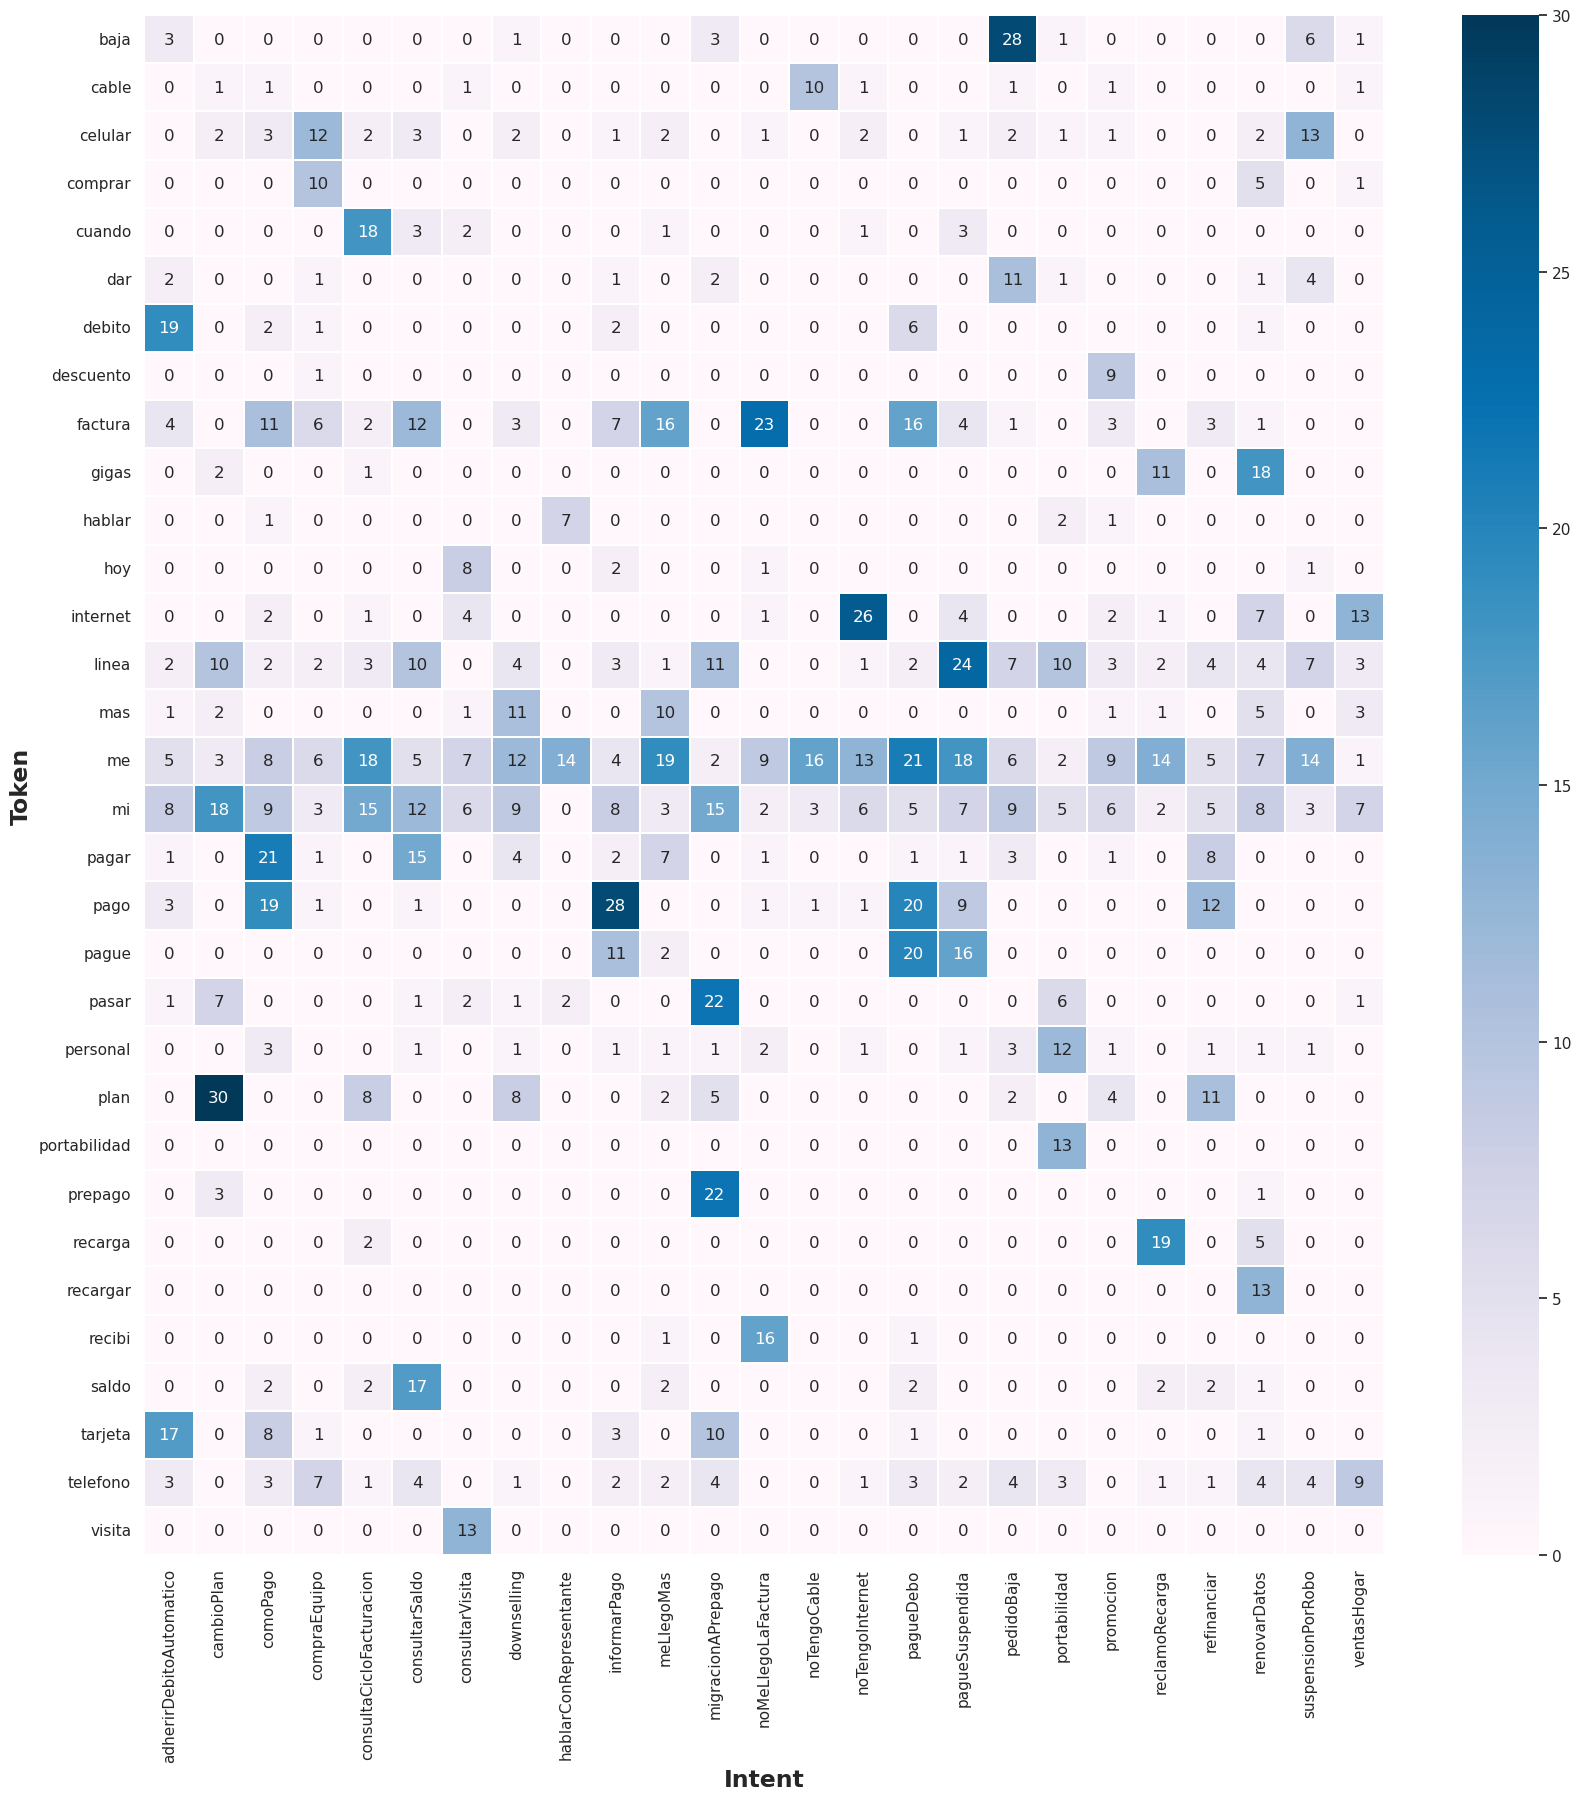

In [15]:
importlib.reload(keyword_analyzer)

INTENTS_TO_DISPLAY = 25  # Total number of intents for display
MAX_TERMS_DISPLAY = 30  # Total number of terms to display

intent_list = []
keyword_analyzer.seaborn_heatmap(workspace_pd, lang_util, INTENTS_TO_DISPLAY, MAX_TERMS_DISPLAY, intent_list)

### Term Analysis for Custom Intent List

If you wish to see term analysis for specific intents, feel free to add those intents to the intent list. This shall generate a custom term heatmap. By default we show the top 30 tokens, but this can be changed if needed

In [16]:
importlib.reload(keyword_analyzer)
# intent_list = ['intent1','intent2','intent3'] 
intent_list = [] 


MAX_TERMS_DISPLAY = 20  # Total number of terms to display

if intent_list: 
    keyword_analyzer.seaborn_heatmap(workspace_pd, INTENTS_TO_DISPLAY, MAX_TERMS_DISPLAY, intent_list)

### Actions for Anomalous Terms in Heat Map

If you notice any terms or words which should not be frequently present within an intent, consider modifying examples in that intent

<a id='part1.5'></a>
## 1.5 Ambiguity in Training Data
### Uncover possibly ambiguous terms based on feature correlation
Based on the chi-square analysis above, we generate intent pairs whose correlated unigrams and bigrams overlap.
This allows us to get a glimpse of which unigrams or bigrams might cause potential confusion in intent detection.

### A. Top Intent Pairs whose correlated unigrams overlap

In [17]:
importlib.reload(chi2_analyzer)
ambiguous_unigram_df = chi2_analyzer.get_confusing_key_terms(unigram_intent_dict)

Intent Pairs,Terms
"<renovarDatos, reclamoRecarga>",gig
"<cambioPlan, consultaPlan>",plan
"<ventasHogar, cambioTitularidad>",pon
"<comoPago, informarPago>",pag
"<downselling, pedidoBaja>",baj
"<estadoEquipo, cancelaEquipo>",compr
"<consultarSaldo, consultaDatosDisponibles>",cuant
"<renovarDatos, consultaCicloFacturacion>",credit
"<pagueDebo, pagueSuspendida>",pag
"<pagueDebo, informarPago>",pag


### B. Top Intent Pairs whose correlated bigrams overlap

In [18]:
importlib.reload(chi2_analyzer)
ambiguous_bigram_df = chi2_analyzer.get_confusing_key_terms(bigram_intent_dict)

There is no ambiguity based on top 5 key terms in chi2 analysis

### Uncover ambiguous utterances across intents
The following analysis shows user examples that are similar but fall under different Intents.  

In [19]:
importlib.reload(similarity_analyzer)
similar_utterance_diff_intent_pd = similarity_analyzer.ambiguous_examples_analysis(workspace_pd, lang_util)

Intent1,Utterance1,Intent2,Utterance2,similarity score
noTengoCable,se me rompio el deco,destruccionEquipo,se me rompio el equipo,0.777778
ventasHogar,contratar el servicio de star plus,consultasRoaming,contratar el servicio de roaming,0.703526


In [20]:
# Grabar archivo? 
if GRABAR_ARCHIVO == True and not similar_utterance_diff_intent_pd.empty:
    # graba
    try:
        #project.save_data(NOMBRE_ARCHIVO, similar_utterance_diff_intent_pd.to_csv(mode='w',index=True))
        project.save_data(data=similar_utterance_diff_intent_pd.to_csv(mode='w',index=True), file_name=NOMBRE_ARCHIVO, overwrite=True)
    except Exception as e:
        strerr = str(e)
        if strerr.rfind('already exists') > 0:
            display(Markdown('### ERROR: el archivo '+NOMBRE_ARCHIVO+' ya existe y no se puede sobreescribir. <br><br><i>Nota: Intentá eliminar el archivo en el storage del Cloudpak y volvé a ejecutar SOLO esta celda para que se grabe el archivo.</i>'))
        else:
            print(Exception, e)
    else:
        display(Markdown("### Archivo de Errores grabado como: " + NOMBRE_ARCHIVO))
        print ('Nota: El archivo se grabó como Asset en Cloudpak, no en el bucket. Después de descargarlo, por favor eliminalo del repositorio.')
    

### Archivo de Errores grabado como: ambig_utter_873fbf.csv

Nota: El archivo se grabó como Asset en Cloudpak, no en el bucket. Después de descargarlo, por favor eliminalo del repositorio.


## Actions for Ambiguity in Training Data

**Ambiguous Intent Pairs**  
If you see terms which are correlated with more than 1 intent, please review if this seems anomalous based on the use case for that intent. If it seems reasonable, it may not be an issue.  

**Ambiguous Utterances across intents** 
1. **Duplicates Utterances**: For duplicate or almost identical utterances, remove those that seem unnecessary
2. **Similar Utterances**: For similar utterances please review the use case for those intents and make sure that they are not accidental additions caused by human error in creating the training data  

Reference for more information on entity: <a href="https://cloud.ibm.com/docs/services/assistant/services/assistant?topic=assistant-entities" target="_blank" rel="noopener no referrer">Entity Documentation</a>

For more in-depth analysis related to possible conflicts in your training data across intents, try the conflict detection feature in Watson Assistant: <br> <a href="https://cloud.ibm.com/docs/services/assistant?topic=assistant-intents#intents-resolve-conflicts" target="_blank" rel="noopener no referrer">Conflict Resolution Documentation</a>